# Heart Disease Prediction

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 
import statistics 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Calling the data
df = pd.read_csv(r'C:\Datos\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
#Counting the missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Renaming columns for a better comprehension
df.rename(columns={"cp": "Chest_Pain", "trestbps": "Blood_Pressure", "chol": "Cholesterol", 
                  "fbs": "Blood_Sugar", "restecg": "Electrocardiogram", 
                  "thalach": "Heart_Rate", "exang": "Angina" })

,age,sex,Chest_Pain,Blood_Pressure,Cholesterol,Blood_Sugar,Electrocardiogram,Heart_Rate,Angina,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
df = df.rename(columns={"cp": "Chest_Pain", "trestbps": "Blood_Pressure", "chol": "Cholesterol", 
                  "fbs": "Blood_Sugar", "restecg": "Electrocardiogram", 
                  "thalach": "Heart_Rate", "exang": "Angina" })

In [8]:
positive = df[df['target'] == 1]
positive

,age,sex,Chest_Pain,Blood_Pressure,Cholesterol,Blood_Sugar,Electrocardiogram,Heart_Rate,Angina,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


In [9]:
positive['age']

5       58
10      71
12      34
15      34
16      51
        ..
1011    45
1014    44
1019    47
1020    59
1023    50
Name: age, Length: 526, dtype: int64

In [10]:
negative = df[df['target'] == 0]
negative

,age,sex,Chest_Pain,Blood_Pressure,Cholesterol,Blood_Sugar,Electrocardiogram,Heart_Rate,Angina,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


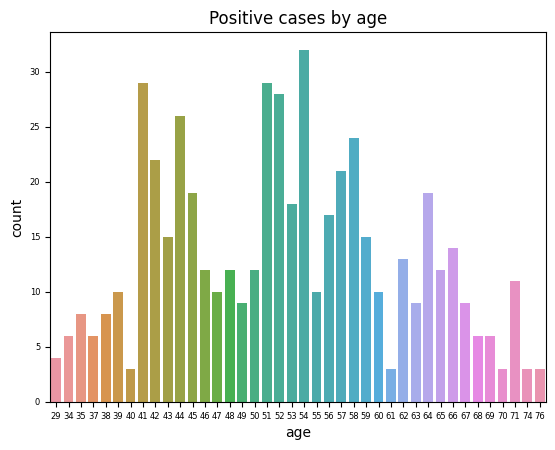

In [11]:
sns.countplot(data=positive, x='age')
plt.title('Positive cases by age')
plt.tick_params(axis='both', which='major', labelsize=6)

In [12]:
mean = statistics.mean(positive['age']) 
sd = statistics.stdev(positive['age']) 
print('The mean age with the most positive cases is:', mean)
print('The Standard Deviation is:', sd)

The mean age with the most positive cases is: 52.40874524714829
The Standard Deviation is: 9.631804436776667


Text(0.5, 1.0, 'Normal Distributions')

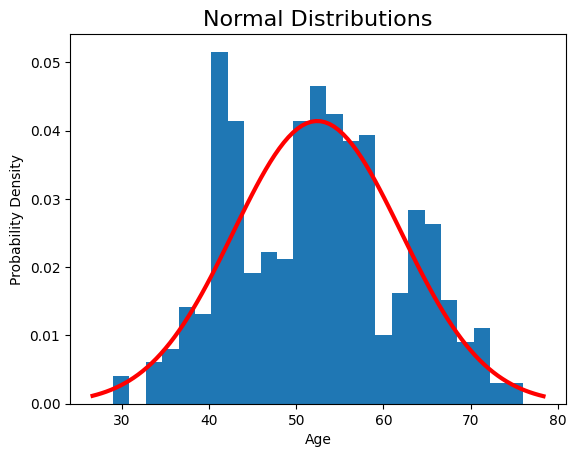

In [13]:
plt.hist(positive['age'], bins=25, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
probability_density = norm.pdf(x, mean, sd)

plt.plot(x, probability_density, linewidth=3, color='red')

plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('Normal Distributions', fontsize=16)

Text(0.5, 1.0, 'Positive cases of heart disease by sex')

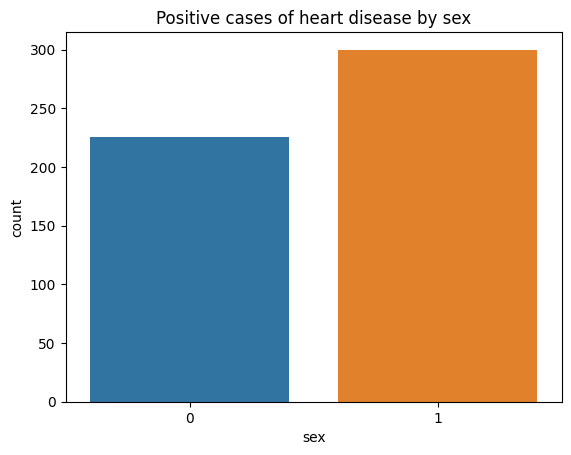

In [14]:
fig, ax = plt.subplots()
sns.countplot(data=positive, x='sex')
plt.title('Positive cases of heart disease by sex')

In [15]:
df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [16]:
positive['sex'].value_counts()

sex
1    300
0    226
Name: count, dtype: int64

In [17]:
print('The ratio between total patients and positive cases is')
positive['sex'].value_counts() / 1025

The ratio between total patients and positive cases is


sex
1    0.292683
0    0.220488
Name: count, dtype: float64

In [18]:
print('The ratio between total patients and positive cases by each gender is \t')
print('sex \t')
pos_g1 = 300/713
pos_g0 = 226/312
print('1   ' , pos_g1)
print('0   ' , pos_g0)

The ratio between total patients and positive cases by each gender is 	
sex 	
1    0.42075736325385693
0    0.7243589743589743


In [19]:
#Correlations with the target
corr = df.corr()
corr

,age,sex,Chest_Pain,Blood_Pressure,Cholesterol,Blood_Sugar,Electrocardiogram,Heart_Rate,Angina,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
Chest_Pain,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
Blood_Pressure,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
Cholesterol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
Blood_Sugar,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
Electrocardiogram,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
Heart_Rate,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
Angina,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

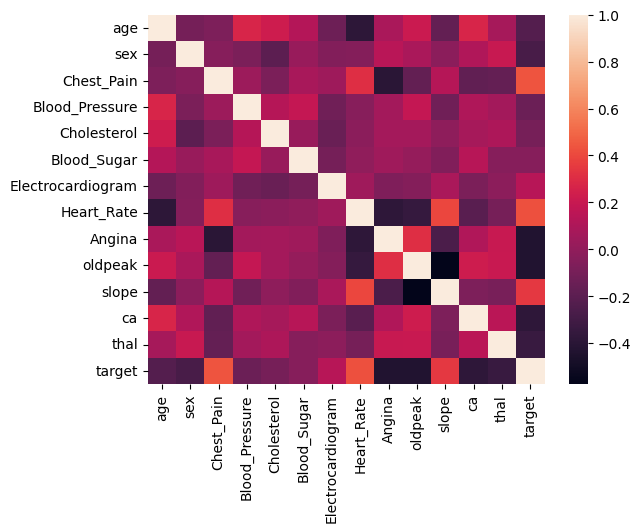

In [20]:
#Correlation heatmap
sns.heatmap(corr)

## Features

In [21]:
#Defining features
X = df.drop(['target'], axis=1)
y = df['target']

In [22]:
#Spliting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
#Scaling the data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

## Logistic Regression

In [24]:
#Training the model
model = LogisticRegression(fit_intercept=False)
model.fit(X_train, y_train)

LogisticRegression(fit_intercept=False)

In [25]:
#Making predictions
y_pred = model.predict(X_test)

In [26]:
lr_accuracy = accuracy_score(y_test, y_pred)
lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy {lr_accuracy}')
print('Confusion Matrix:\n', lr_conf_matrix)
print('Classification Report:\n', lr_classification_rep)

Accuracy 0.801948051948052
Confusion Matrix:
 [[112  47]
 [ 14 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.79       159
           1       0.74      0.91      0.82       149

    accuracy                           0.80       308
   macro avg       0.82      0.81      0.80       308
weighted avg       0.82      0.80      0.80       308



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

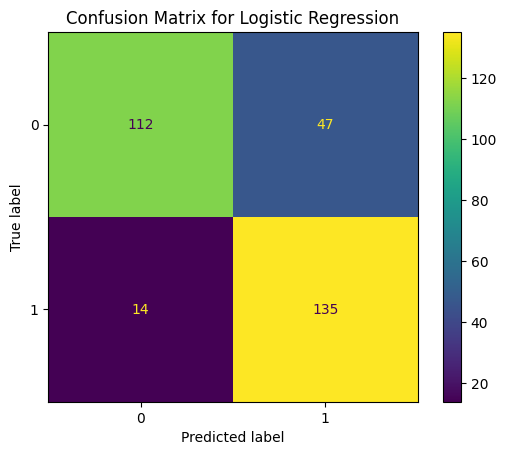

In [27]:
lr_display = ConfusionMatrixDisplay(lr_conf_matrix).plot()
plt.title('Confusion Matrix for Logistic Regression')

## Naive Bayes

In [28]:
N_Bay = GaussianNB()
N_Bay.fit(X_train,y_train)

GaussianNB()

In [29]:
#Making predictions
y_predict_NB = N_Bay.predict(X_test)

In [30]:
NB_accuracy = accuracy_score(y_test, y_predict_NB)
NB_conf_matrix = confusion_matrix(y_test, y_predict_NB)
NB_classification_rep = classification_report(y_test, y_predict_NB)

print(f'Accuracy {NB_accuracy}')
print('Confusion Matrix:\n', NB_conf_matrix)
print('Classification Report:\n', NB_classification_rep)

Accuracy 0.8214285714285714
Confusion Matrix:
 [[118  41]
 [ 14 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81       159
           1       0.77      0.91      0.83       149

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.83      0.82      0.82       308



Text(0.5, 1.0, 'Confusion Matrix for Naive-Bayes')

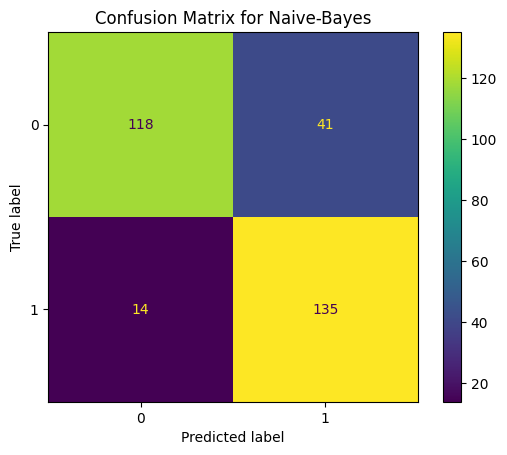

In [31]:
NB_display = ConfusionMatrixDisplay(NB_conf_matrix).plot()
plt.title('Confusion Matrix for Naive-Bayes')

## K-Neighbors Classifier

In [32]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
#Predictions
knc_predict = knc.predict(X_test)

In [34]:
knc_accuracy = accuracy_score(y_test, knc_predict)
knc_conf_matrix = confusion_matrix(y_test, knc_predict)
knc_classification_rep = classification_report(y_test, knc_predict)

print(f'Accuracy {knc_accuracy}')
print('Confusion Matrix:\n', knc_conf_matrix)
print('Classification Report:\n', knc_classification_rep)

Accuracy 0.8636363636363636
Confusion Matrix:
 [[131  28]
 [ 14 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       159
           1       0.83      0.91      0.87       149

    accuracy                           0.86       308
   macro avg       0.87      0.86      0.86       308
weighted avg       0.87      0.86      0.86       308



Text(0.5, 1.0, 'Confusion Matrix for K-Neighbors')

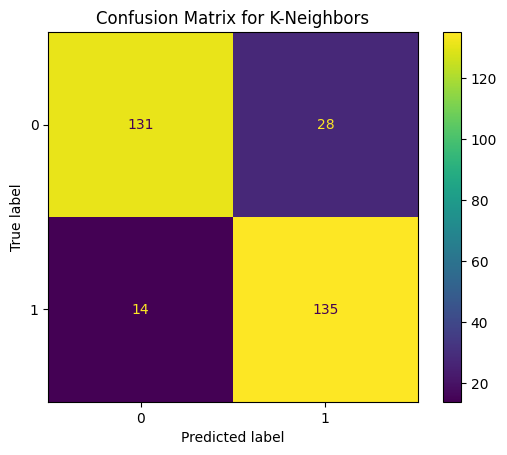

In [35]:
knc_display = ConfusionMatrixDisplay(knc_conf_matrix).plot()
plt.title('Confusion Matrix for K-Neighbors')

In [36]:
dtr = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dtr.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [37]:
#Making predictions
dtr_predict = dtr.predict(X_test)

In [38]:
dtr_accuracy = accuracy_score(y_test, dtr_predict)
dtr_conf_matrix = confusion_matrix(y_test, dtr_predict)
dtr_classification_rep = classification_report(y_test, dtr_predict)

print(f'Accuracy {dtr_accuracy}')
print('Confusion Matrix:\n', dtr_conf_matrix)
print('Classification Report:\n', dtr_classification_rep)

Accuracy 0.9025974025974026
Confusion Matrix:
 [[141  18]
 [ 12 137]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       159
           1       0.88      0.92      0.90       149

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.90      0.90      0.90       308



Text(0.5, 1.0, 'Confusion Matrix Decission Tree Classifier')

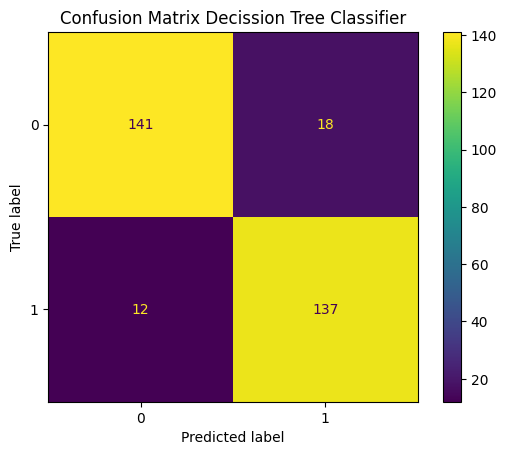

In [39]:
dtr_display = ConfusionMatrixDisplay(dtr_conf_matrix).plot()
plt.title('Confusion Matrix Decission Tree Classifier')

## Model Evaluation

In [40]:
lr_acc = lr_accuracy*100
nb_acc = NB_accuracy*100
knc_acc = knc_accuracy*100
dtr_acc = dtr_accuracy*100

In [41]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes',
                    'K-Nearest Neighbour', 'Decission Tree Regression'], 
                        'Accuracy': [lr_acc, nb_acc, knc_acc, dtr_acc]})
model_ev

,Model,Accuracy
0,Logistic Regression,80.194805
1,Naive Bayes,82.142857
2,K-Nearest Neighbour,86.363636
3,Decission Tree Regression,90.259740


## Generating data to test the model

In [42]:
num_rows = 5

In [43]:
data = {
    'age': np.random.randint(29, 76, size=num_rows),
    'sex': np.random.choice([0,1], size=num_rows),
    'Chest_Pain': np.random.choice([1, 2, 3, 4], size=num_rows),
    'Blood_Pressure': np.random.randint(94, 200, size=num_rows),
    'Cholesterol': np.random.randint(126, 564, size=num_rows),
    'Blood_Sugar': np.random.choice([0, 1], size=num_rows),
    'Electrocardiogram': np.random.choice([0, 1, 2], size=num_rows),
    'Heart_Rate': np.random.randint(70, 200, size=num_rows),
    'Angina': np.random.choice([1, 0], size=num_rows), 
    'oldpeak': np.random.randint(0, 6.2, size=num_rows),
    'slope': np.random.choice([0, 1, 2], size=num_rows),
    'ca': np.random.choice([0, 1, 2, 3], size=num_rows),
    'thal': np.random.choice([0, 1, 2], size=num_rows)
}

In [44]:
testing_df = pd.DataFrame(data)
testing_df

,age,sex,Chest_Pain,Blood_Pressure,Cholesterol,Blood_Sugar,Electrocardiogram,Heart_Rate,Angina,oldpeak,slope,ca,thal
0,48,1,1,182,316,1,2,70,0,2,1,1,2
1,67,0,2,192,265,1,0,126,0,4,1,0,1
2,47,1,1,135,313,0,2,177,1,5,0,1,0
3,30,0,4,152,150,0,0,116,0,5,0,0,2
4,39,1,2,111,195,1,1,115,0,5,1,1,0


In [45]:
#Making predictions on the testing data
y_test_pred = dtr.predict(testing_df)
y_test_pred

array([1, 1, 0, 1, 0], dtype=int64)

In [49]:
#Printing the predictions
print('Predictions:')
for i, prediction in enumerate(y_test_pred):
    print(f"Patient {i}: {'More chance of heart attack' if prediction == 1 else 'Less Chance of heart attack'} ")

Predictions:
Patient 0: More chance of heart attack 
Patient 1: More chance of heart attack 
Patient 2: Less Chance of heart attack 
Patient 3: More chance of heart attack 
Patient 4: Less Chance of heart attack 
